<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 4*

---

# Logistic Regression

## 🏆 학습목표

- 분류(classification) 문제와 회귀 문제의 차이점을 파악하고 문제에 맞는 모델을 사용할 수 있습니다.
- 로지스틱회귀(Logistic regression)를 이해하고 모델을 학습할 수 있습니다.
- 분류 평가지표를 이해하고 적절하게 사용할 수 있습니다.
    - **Confusion matrix** 를 만들고 해석할 수 있습니다.
    - **정밀도, 재현율** 을 이해하고 사용할 수 있습니다.
    - **ROC Curve, AUC 점수** 를 이해하고 사용할 수 있습니다.

### Warm up

#### 다음 영상을 시청하세요:

- [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8&feature=youtu.be)
    - 로지스틱회귀와 선형회귀분석의 차이점이 무엇인가요?


N211에서 지도학습은 회귀 문제와 분류 문제로 나눌 수 있다고 했습니다. 
- 회귀 문제는 어떤 타겟값을 예측하는 문제인가요?
- 분류 문제는 어떤 타겟값을 예측하는 문제인가요?
- 회귀 문제와 분류 문제는 어떤 차이점이 있었나요?

### 📚 아래 라이브러리를 설치해 주세요.

#### 이번 모듈에서 추가적으로 사용하는 라이브러리는 다음과 같습니다. 설치를 확인해 주세요.
- [**category_encoders**](https://contrib.scikit-learn.org/category_encoders/)

In [ ]:
# 원핫인코딩을 위해 category_encoders 라이브러리를 설치해줍니다.
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

## 분류(Classification) 문제

#### 1. 타겟
- 분류 문제는 데이터가 속할 특정 범주(특정 범주에 속할 확률)를 예측합니다. 
    - 이진 분류 : 타겟값이 두 가지 범주인 경우(Yes or No)
    - 다중 분류 : 타겟값이 세 가지 이상의 범주인 경우 (Class1 or Class2 or Class3)

#### 2. 기준모델
- 분류 문제는 회귀 문제와 다른 기준으로 기준 모델을 설정합니다.
    - 회귀문제에서는 보통 `타겟 변수의 평균값`을 기준모델로 사용합니다. 
    - 분류 문제에서는 보통 `최빈 클래스 값`을 기준모델로 설정합니다.
- 분류 문제에서는 타겟 변수가 편중된 범주 비율을 가지는 경우가 많습니다.    
    - 타겟값의 비율이 Class1 : Class0 = 1:9 인 데이터를 가지고 모델을 만들었는데 모델 예측 정확도가 90%가 나왔습니다. 이 모델은 좋은 모델일까요?
    - 위의 모델은 모든 데이터를 Class0으로만 예측해도 예측 정확도 90%를 달성할 수 있습니다. 
    - 이런 경우 최빈클래스 기준모델의 예측정확도 90%를 기준으로 이보다 더 좋은 성능을 가진 모델을 만들기 위해 노력해야 합니다.


#### 3. 평가지표
- 분류 문제는 회귀 문제와 다른 평가지표를 사용합니다.
    - 회귀 문제의 평가지표로는 무엇이 있었는지 생각해보세요.
- 분류 문제의 평가지표로는 아래와 같은 것들이 있습니다. 이번 노트에서 더 자세히 알아보도록 하겠습니다.
    - Accuracy (정확도)
    - Recall (재현율)
    - Precision (정밀도)
    - F1 score
    - roc_auc score


## 🔍 Logistic Regression
- 선형회귀로 분류 문제를 풀 수 있을까요?
  - 선형회귀의 결과값은 $-\infty$ ~ $+\infty$ 입니다. 
  - 이와 같은 결과값으로는 어떤 특정 범주에 속할 확률을 정확하게 알 수 없습니다.
<br></br>

- 하지만 선형회귀에 시그모이드(로지스틱) 함수를 씌우면 확률을 구할 수 있습니다. 
  - $sigmoid$ 함수($\sigma$)는 다음과 같습니다. <br> $ \sigma(x) = \large\frac{1}{1 + e^{-x}}$
  - 선형회귀식 $\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{n}X_{n}$ 에 위의 시그모이드 함수를 씌우면 로지스틱 회귀모델을 만들 수 있습니다.
<br></br>

- 로지스틱 회귀모델은 다음과 같은 식으로 나타낼 수 있습니다. <br>
  $$\large P(Y=1|X=x)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}$$ 
  $$ 0 \leq P(Y=1|X=x) \leq 1$$

- 로지스틱 회귀모델은 0과 1 사이의 값을 출력하며 출력값이 0.5 이상일 경우는 Class1로 0.5 미만일 경우는 Class0으로 분류합니다.
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png" width="60%">
    

간단한 예시를 통해 로지스틱 함수의 특징을 살펴보도록 하겠습니다.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

# 예시를 위해 가상 데이터를 만듭니다.
X, y = make_classification(n_samples=10000, n_features=10, random_state=42)
X = pd.DataFrame(data=X)

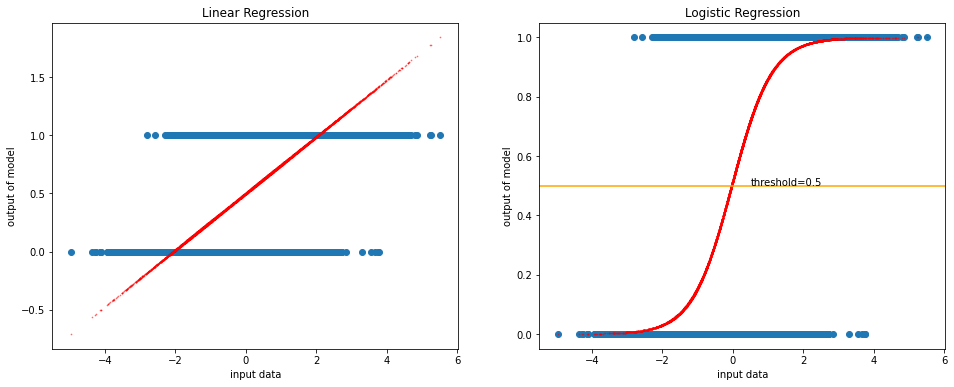

In [ ]:
# 위에서 만든 가상 데이터의 10개의 특성 중 4번 특성을 사용해 선형회귀모델과 로지스틱 회귀모델의 차이를 확인해보겠습니다.

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.scatter(x=X[4], y=y)

# linear regression
ls = LinearRegression()
ls.fit(X[[4]], y)
X['y_pred_lr'] = ls.predict(X[[4]])
ax1.scatter(X[4], X['y_pred_lr'], s = 0.5, color='red', alpha=0.5)
ax1.set_ylabel('output of model')
ax1.set_xlabel('input data')
ax1.set_title('Linear Regression')

# logistic regression
ax2 = fig.add_subplot(122)
ax2.scatter(x=X[4], y=y)

lr = LogisticRegression()
lr.fit(X[[4]], y)

X['y_pred_proba'] = lr.predict_proba(X[[4]])[:,1]
ax2.scatter(X[4], X['y_pred_proba'], s = 0.5, color='red', alpha=0.5)
ax2.axhline(0.5, color='orange')
ax2.text(0.5, 0.5, 'threshold=0.5')
ax2.set_ylabel('output of model')
ax2.set_xlabel('input data')
ax2.set_title('Logistic Regression')

plt.show()

위의 그래프를 보면
- 선형회귀의 결과값은 1과 0을 넘어서는 것을 확인할 수 있습니다.
- 반면 로지스틱 회귀모델은 0과 1사이의 값이 나오는 것을 알 수 있습니다.


실제 0.5가 넘으면 결과값을 1로 반환하는지 확인해보겠습니다.

In [ ]:
returns = pd.DataFrame(data={'probability of Class1': lr.predict_proba(X[[4]])[:,1], 'Prediction':lr.predict(X[[4]])})
returns

,probability of Class1,Prediction
0,0.770792,1
1,0.718633,1
2,0.911778,1
3,0.974705,1
4,0.761530,1
...,...,...
9995,0.781462,1
9996,0.199444,0
9997,0.119481,0
9998,0.059129,0


In [ ]:
print("확률값이 0.5 이상인 샘플의 결과 : ", returns.loc[returns['probability of Class1']>=0.5,'Prediction'].value_counts())
print("확률값이 0.5 미만인 샘플의 결과 : ", returns.loc[returns['probability of Class1']<0.5,'Prediction'].value_counts())

확률값이 0.5 이상인 샘플의 결과 :  1    5183
Name: Prediction, dtype: int64
확률값이 0.5 미만인 샘플의 결과 :  0    4817
Name: Prediction, dtype: int64


0.5를 기준으로 로지스틱 회귀모델은 0.5 이상은 모두 1, 0.5 미만은 모두 0으로 반환하는 것을 알 수 있습니다.

### 🦠  Case Study : Heart Disease Risk Prediction

- 이번 노트에서는 2020 annual CDC survey data를 가지고 심장병 발병 예측을 해보도록 하겠습니다. 
- 데이터에 대한 자세한 설명은 아래 링크를 확인해주세요.  
    [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

In [ ]:
# 데이터를 불러오겠습니다. 

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/heart_2020_cleaned.csv')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

#### EDA
- 분류 문제를 풀기 전에 항상 먼저 타겟의 범주가 어떤 비율을 가지고 있는지 확인해 보아야 합니다.
- No는 0.91, Yes는 0.09로 타겟의 범주 비율이 매우 불균형함을 알 수 있습니다.

타겟데이터의 비율
 No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64


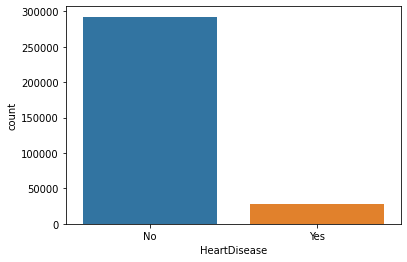

In [ ]:
# 타겟 데이터 범주의 비율을 확인합니다.
y =  df['HeartDisease']
print("타겟데이터의 비율\n",y.value_counts(normalize=True))


%matplotlib inline
sns.countplot(x=y);

다른 특성들도 살펴보겠습니다.

In [ ]:
# 중복값을 확인해보겠습니다.
# 약 5% 정도의 데이터가 중복되어있는 것을 확인할 수 있습니다. 중복 데이터는 삭제해주겠습니다.
print("중복된 데이터의 비율", df.duplicated().sum()/len(df))
df.drop_duplicates(keep='first', inplace=True)
df.shape

중복된 데이터의 비율 0.05652996450851327


(301717, 18)

In [ ]:
# 결측치는 없습니다. 
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

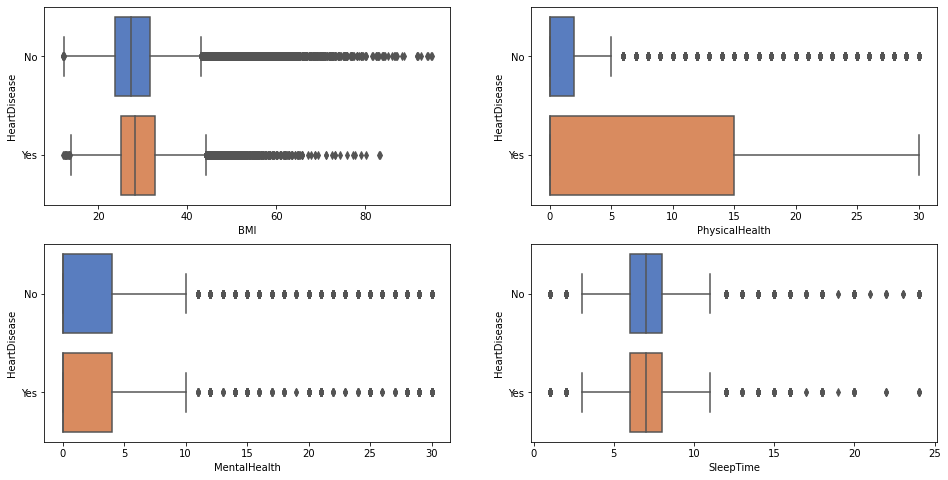

In [ ]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
fig = plt.figure(figsize=(16, 8))
i = 1
for f in numeric_features :
    plt.subplot(2,2,i)
    sns.boxplot(data=df, x=f, y = 'HeartDisease', palette="muted")
    i += 1

In [ ]:
# 수치형 특성의 아웃라이어를 삭제해주겠습니다.

def outlier_iqr(data) :
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    return q3 + (iqr*1.5)

bmi_upper = outlier_iqr(df['BMI'])
ph_upper = outlier_iqr(df['PhysicalHealth'])
mh_upper = outlier_iqr(df['MentalHealth'])
sl_upper = outlier_iqr(df['SleepTime'])

df = df[(df['BMI']<bmi_upper) | (df['PhysicalHealth']<ph_upper) | (df['MentalHealth']<mh_upper) | (df['SleepTime'] <sl_upper)]

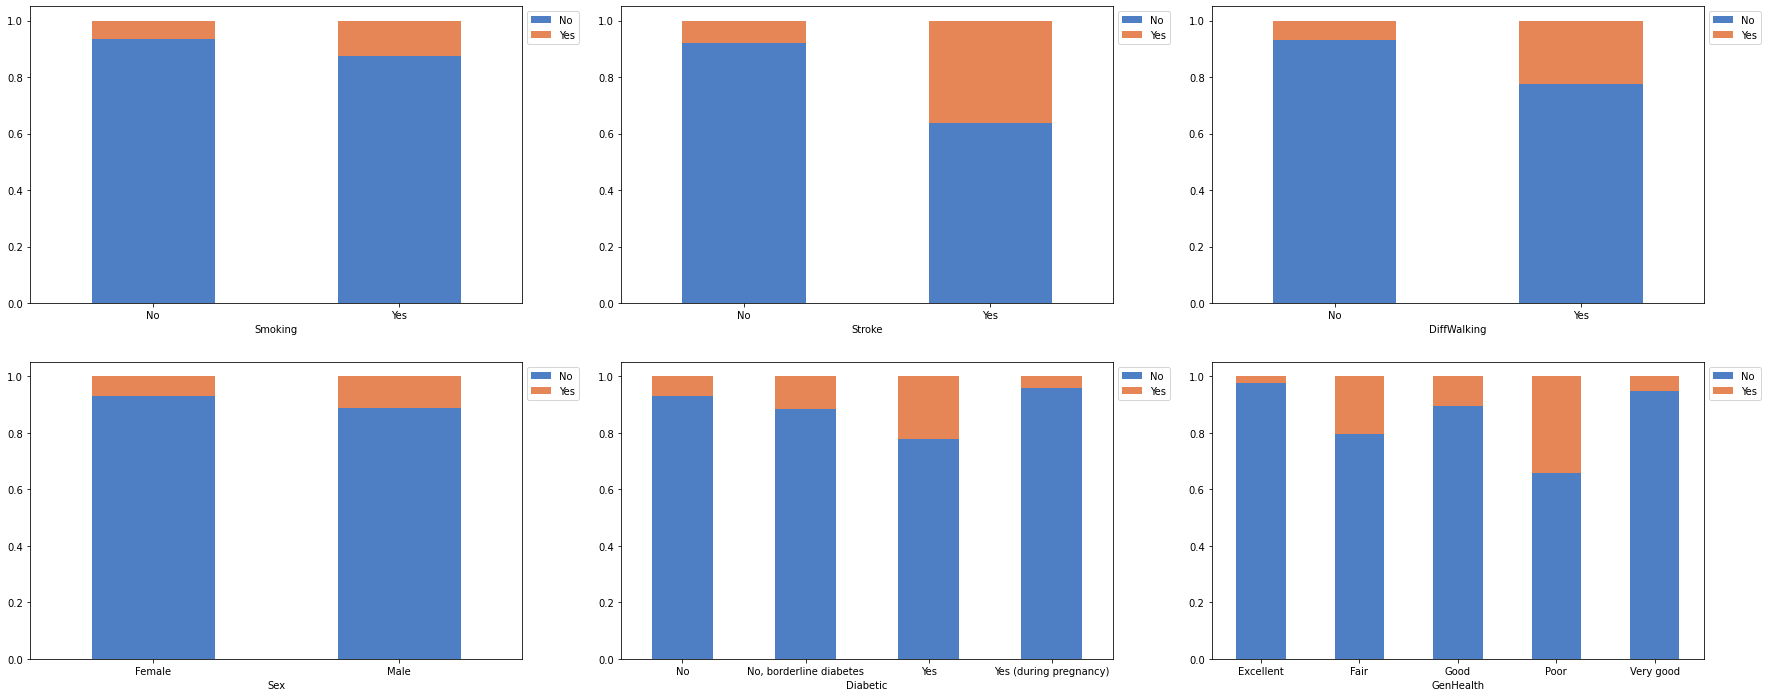

In [ ]:
# 범주형 특성 일부와 타겟의 관계를 시각화해보겠습니다.

cat_features = ['Smoking','Stroke','DiffWalking','Sex','Diabetic','GenHealth']
fig = plt.figure(figsize=(30, 12))

for i, feature in enumerate(cat_features) :
    tmp = pd.crosstab(index=df[feature], columns=df['HeartDisease'], normalize='index')
    ax = plt.subplot(2,3,i+1)
    tmp.plot(kind='bar', stacked=True, ax=plt.gca(), color = ['#4e7fc4', '#e68656'])
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    i += 1
plt.show()

- 담배를 필수록, 뇌졸중이 있으면, 걷거나 계단을 오를 때 힘이 들면, 남성일수록, 당뇨병이 있으면, 전반적인 건강이 안 좋을수록 심장병이 있을 가능성이 높아보입니다.

문자형 자료인데 순서가 있는 데이터는 순서 정보가 들어갈 수 있도록 직접 숫자로 치환해주겠습니다.

In [ ]:
# 나이
age_encoding = {'65-69':67, '60-64':62, '70-74':72, '55-59':57, '50-54':52, '80 or older':80, '75-79':77, 
                 '45-49':47, '18-24' :20, '40-44':42, '35-39':37, '30-34':32, '25-29':27}

df['AgeCategory'] = df['AgeCategory'].replace(age_encoding)
df['AgeCategory'].astype('float')

0         57.0
1         80.0
2         67.0
3         77.0
4         42.0
          ... 
319790    62.0
319791    37.0
319792    47.0
319793    27.0
319794    80.0
Name: AgeCategory, Length: 301648, dtype: float64

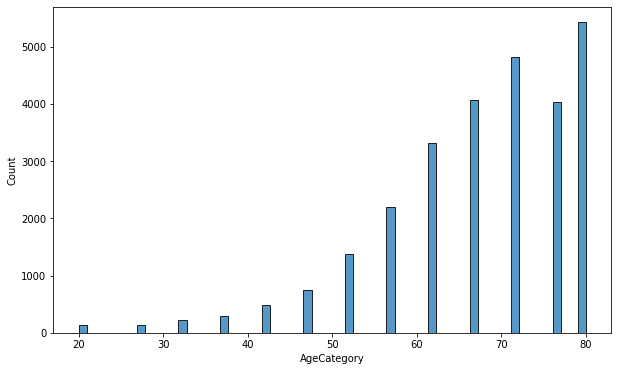

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df.query('HeartDisease=="Yes"')['AgeCategory'])

- 나이가 많을수록 심장병에 걸리는 사람이 많습니다.

In [ ]:
# 전반적인 건강상태
genh_encoding = {'Poor':1, 'Fair':2, 'Excellent':3, 'Good':4, 'Very good':5}

df['GenHealth'] = df['GenHealth'].replace(genh_encoding)
df['GenHealth'].astype('float')

0         5.0
1         5.0
2         2.0
3         4.0
4         5.0
         ... 
319790    2.0
319791    5.0
319792    4.0
319793    4.0
319794    4.0
Name: GenHealth, Length: 301648, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


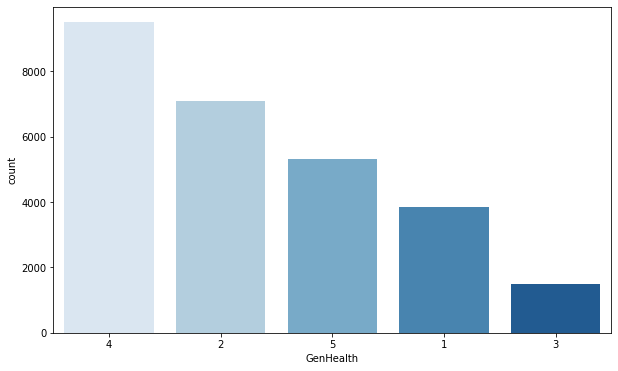

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df.query('HeartDisease=="Yes"')['GenHealth'], palette='Blues', order = [4,2,5,1,3])

심장병이 있는 사람 중 전반적인 건강상태를 good으로 선택한 사람이 가장 많습니다.  
본인의 건강상태를 정확하게 모르고 심장병이 발병하는 경우도 있을 것 같습니다.

### Modeling

In [ ]:
# train, validation, test set으로 먼저 나눠주겠습니다.

from sklearn.model_selection import train_test_split

# 타겟값이 문자형이기 때문에 수치형으로 바꿔주겠습니다.
df['HeartDisease'] = df['HeartDisease'].replace({'No':0, 'Yes':1})

y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)
# stratify 값으로는 target 값을 지정해주면 됩니다.
# stratify값을 target 값으로 지정해주면 target의 class 비율을 유지 한 채로 데이터 셋을 split 하게 됩니다.
# 만약 이 옵션을 지정해주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (169677, 17)
X_val shape:  (56559, 17)
X_test shape:  (75412, 17)


#### 기준 모델
- 최빈 클래스 0 (majority class)으로 모든 예측을 수행해 보겠습니다.

In [ ]:
# mode(): Return the highest frequency value in a Series.
base_major = y_train.mode()[0]

# 타겟 샘플 수만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred_base = [base_major] * len(y_train)

**분류에서는 회귀와 다른 평가지표(evaluation metrics)를 사용합니다.**  
[scikit-learn, Scoring functions](https://scikit-learn.org/stable/modules/model_evaluation.html)
- 절대로 회귀평가지표를 분류에 사용하시면 안됩니다. 그 반대도 마찬가지 입니다.

- 정확도([Accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)) 는 분류문제에서 사용하는 평가지표입니다.
  - Accuracy $=\frac{올바르게~예측한~수} {전체~예측~수}$



이렇게 기준모델로 최빈 클래스를 사용할 경우 정확도를 구해 봅시다.

In [ ]:
# 최빈 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score

print("training accuracy: ", accuracy_score(y_train, y_pred_base).round(2))

training accuracy:  0.91


In [ ]:
# 검증세트에서도 정확도를 확인해 볼 수 있습니다.
y_pred_base_val = [base_major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred_base_val).round(2))

validation accuracy:  0.91


#### Preprocessing : Scaling & Encoding
- sklearn의 로지스틱 회귀모델은 디폴트로 `L2 penalty`가 적용되는 정규화 모델입니다. 따라서 모델을 만들기 전 표준화 작업이 필요합니다.
- linear regression과 마찬가지로 문자형 변수를 수치형 변수로 변환해줘야 합니다. 이번에도 One-Hot Encoding을 사용하겠습니다. 

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169677 entries, 285929 to 168003
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               169677 non-null  float64
 1   Smoking           169677 non-null  object 
 2   AlcoholDrinking   169677 non-null  object 
 3   Stroke            169677 non-null  object 
 4   PhysicalHealth    169677 non-null  float64
 5   MentalHealth      169677 non-null  float64
 6   DiffWalking       169677 non-null  object 
 7   Sex               169677 non-null  object 
 8   AgeCategory       169677 non-null  int64  
 9   Race              169677 non-null  object 
 10  Diabetic          169677 non-null  object 
 11  PhysicalActivity  169677 non-null  object 
 12  GenHealth         169677 non-null  int64  
 13  SleepTime         169677 non-null  float64
 14  Asthma            169677 non-null  object 
 15  KidneyDisease     169677 non-null  object 
 16  SkinCancer     

In [ ]:
# 1. scaling으로 표준화 작업 진행
from sklearn.preprocessing import StandardScaler
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

scaler = StandardScaler()
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_val[numeric_feats] = scaler.transform(X_val[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

In [ ]:
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
285929,-0.366291,No,No,Yes,-0.437935,-0.507117,No,Female,1.267226,White,No,No,-0.706944,0.630878,No,No,No
153067,-0.279283,No,No,No,-0.437935,-0.507117,No,Male,-0.963264,White,No,No,1.043684,-0.055307,No,No,No
99385,0.177506,No,No,No,-0.437935,-0.507117,No,Male,0.430792,American Indian/Alaskan Native,No,Yes,1.043684,-0.055307,No,No,No
52530,-1.685387,Yes,No,No,-0.437935,1.216864,Yes,Female,0.430792,White,No,No,-1.582258,-1.427676,No,No,No
304417,-0.426885,No,No,No,-0.437935,-0.383976,No,Male,-1.242075,White,No,Yes,0.168370,1.317063,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155596,-0.517000,No,No,No,-0.437935,-0.260834,No,Male,0.988414,White,No,Yes,1.043684,-0.055307,No,No,No
30982,-0.403580,No,No,No,-0.437935,-0.507117,No,Male,0.151981,White,No,Yes,-0.706944,-0.741491,No,No,No
124435,-0.636636,Yes,No,No,1.409620,-0.507117,No,Male,0.151981,White,No,Yes,1.043684,0.630878,No,No,No
197953,-0.036905,Yes,No,No,-0.437935,-0.507117,No,Male,-0.405642,Other,No,Yes,1.043684,-1.427676,No,No,No


In [ ]:
# 2. One-Hot encoding을 통해 수치형 변수로 변화
from category_encoders import OneHotEncoder

ohe = OneHotEncoder()

X_train_ohe = ohe.fit_transform(X_train)
X_val_ohe = ohe.transform(X_val)
X_test_ohe = ohe.transform(X_test)

In [ ]:
X_train_ohe

,BMI,Smoking_1,Smoking_2,AlcoholDrinking_1,AlcoholDrinking_2,Stroke_1,Stroke_2,PhysicalHealth,MentalHealth,DiffWalking_1,...,PhysicalActivity_1,PhysicalActivity_2,GenHealth,SleepTime,Asthma_1,Asthma_2,KidneyDisease_1,KidneyDisease_2,SkinCancer_1,SkinCancer_2
285929,-0.366291,1,0,1,0,1,0,-0.437935,-0.507117,1,...,1,0,-0.706944,0.630878,1,0,1,0,1,0
153067,-0.279283,1,0,1,0,0,1,-0.437935,-0.507117,1,...,1,0,1.043684,-0.055307,1,0,1,0,1,0
99385,0.177506,1,0,1,0,0,1,-0.437935,-0.507117,1,...,0,1,1.043684,-0.055307,1,0,1,0,1,0
52530,-1.685387,0,1,1,0,0,1,-0.437935,1.216864,0,...,1,0,-1.582258,-1.427676,1,0,1,0,1,0
304417,-0.426885,1,0,1,0,0,1,-0.437935,-0.383976,1,...,0,1,0.168370,1.317063,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155596,-0.517000,1,0,1,0,0,1,-0.437935,-0.260834,1,...,0,1,1.043684,-0.055307,1,0,1,0,1,0
30982,-0.403580,1,0,1,0,0,1,-0.437935,-0.507117,1,...,0,1,-0.706944,-0.741491,1,0,1,0,1,0
124435,-0.636636,0,1,1,0,0,1,1.409620,-0.507117,1,...,0,1,1.043684,0.630878,1,0,1,0,1,0
197953,-0.036905,0,1,1,0,0,1,-0.437935,-0.507117,1,...,0,1,1.043684,-1.427676,1,0,1,0,1,0


#### Logistic Regression

- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
logistic = LogisticRegression(class_weight='balanced') # 90:10 비율을 class_weight파라미터로 balance하게 맞춰주겠다. -> 소수 class에 좀더 가중치를 둔다.
logistic.fit(X_train_ohe, y_train)
y_val_pred = logistic.predict(X_val_ohe)
print('logistic train accuracy', logistic.score(X_train_ohe, y_train).round(2))
print("logistic validation accuracy: ", accuracy_score(y_val, y_val_pred).round(2))

logistic train accuracy 0.74
logistic validation accuracy:  0.73


In [ ]:
print('회귀계수가 양수인 특성 상위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).head(3), '\n')
print('회귀계수가 음수인 특성 하위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).tail(3))

회귀계수가 양수인 특성 상위 3개
AgeCategory    1.098894
Stroke_1       0.665117
Diabetic_2     0.409317
dtype: float64 

회귀계수가 음수인 특성 하위 3개
KidneyDisease_1   -0.292974
Sex_1             -0.331306
Stroke_2          -0.600687
dtype: float64


로지스틱 회귀모델도 회귀계수를 출력하여 모델을 해석할 수 있습니다.
- 회귀계수가 양수인 경우 1일 확률이 높아지고 회귀계수가 음수인 경우 1일 확률이 낮아집니다.
- 회귀계수의 절대값이 클수록 영향력이 큽니다.
<br></br>

회귀계수를 살펴보면
- 나이가 많을수록(AgeCategory : 1.098894) 
- 뇌졸중이 있으면(Stroke_1 : 0.665117)
- 당뇨병이 있으면 (Diabetic_2 : 0.409317)  
심장병이 발병할 가능성이 높아지는 것을 알 수 있습니다. 
<br></br>

- 뇌졸중이 없는 경우 (Stroke_2 : -0.600687)
- 여성인 경우 (Sex_1 : -0.331306)
- 신장병이 없는 경우 (KidneyDisease_1 : -0.292974)  
심장병이 발병할 가능성이 낮아지는 것을 알 수 있습니다. 
<br></br>

로지스틱 회귀모델의 회귀계수 해석과 관련해서는 `n214-supplementary`를 참고해주세요.

## 📊 분류 평가지표

- 위에서 구한 기준모델의 accuracy score는 validation set 기준 0.91입니다. 이 모델은 좋은 모델일까요?
- 반면 로지스틱 회귀모델의 accuracy score는 validation set 기준 0.73입니다. 로지스틱 회귀모델은 최빈값 기준모델보다 안 좋은 모델일까요?

### Confusion Matrix
- confusion matrix(혼동행렬, 오차행렬)
    - 분류기가 예측한 결과와 실제 결과에 대한 레코드의 개수를 표시한 테이블 
    - 예측 오류 및 오류의 유형을 아래와 같이 테이블 상에서 확인할 수 있습니다. 
- TP(True Positive) : 실제 Positive인 것을 Positive라고 정확하게 예측한 경우
    - 심장병이 있는 샘플을 심장병이 있다고 예측한 경우
- FP(False Positive) : 실제로는 Negative인데 Positive라고 잘못 예측한 경우
    - 심장병이 없는 샘플을 심장병이 있다고 예측한 경우
- FN(False Negative) :  실제로는 Positive인데 Negative라고 잘못 예측한 경우
    - 심장병이 있는 샘플을 심장병이 없다고 예측한 경우
- TN(True Negative) : 실제 Negative인 것을 Negative라고 정확하게 예측한 경우
    - 심장병이 없는 샘플을 심장병이 없다고 예측한 경우


<img src="https://i.imgur.com/4tes8Au.png" width="80%"/>

In [ ]:
# FN: Predicted as Negative but the actual was Positive
# FP: Predicted as Positive but it was Negative

기준모델과 로지스틱 회귀모델이 각각 샘플을 어떻게 예측했는지 Confusion Matrix로 확인해보겠습니다.  


In [ ]:
y_true0 = y_val.value_counts()[0]
y_true1 = y_val.value_counts()[1]
fn = len(y_pred_base_val) - y_true0
base = pd.DataFrame(index = ['True 0', 'True1'], data = {'Predicted 0':[y_true0, fn], 'Predicted 1':[0,0]})
base

,Predicted 0,Predicted 1
True 0,51450,0
True1,5109,0


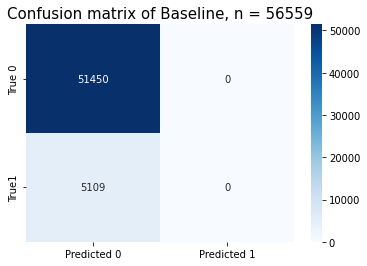

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(base, cmap=plt.cm.Blues, annot=True,fmt="d")
plt.title(f'Confusion matrix of Baseline, n = {len(y_val)}', fontsize=15)
plt.show()

기준모델은 모든 샘플을 0으로 예측하였고 우리가 정말 관심이 있는 `Class1 (HeartDisease=Yes)`은 전혀 예측하지 못했습니다.  
이런 모델은 결코 좋은 예측모델이라고 할 수 없습니다.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


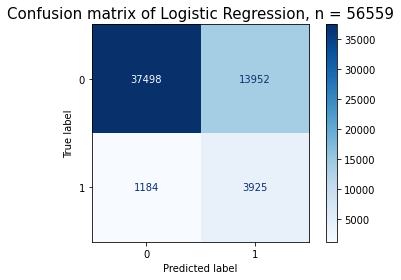

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_val_ohe, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_val)}', fontsize=15)
plt.show()

반면 Logistic Regression의 경우 1을 1이라고 예측한 샘플의 수가 3925로 기준 모델보다 많아졌습니다.  
- 1로 예측하는 샘플이 기준모델보다 많아졌기 때문에 모두 0으로 예측하는 모델보다는 정확도가 떨어졌습니다.  
- 하지만 우리가 정말 관심있는 `Class1 (HeartDisease=Yes)`에 대해서는 기준모델보다 더 많이 맞췄기 때문에 기준모델보다 더 좋은 모델이라고 할 수 있습니다.

### Precision, Recall
위에서 본 것과 같이 타겟이 불균형한 경우 Accuracy는 모델의 성능을 비교하기에 적절하지 않은 평가지표입니다. 이런 경우에는 정확한 성능 판단을 위해 정확도 외에 다른 평가지표를 봐야합니다.  
특히 **정밀도(precision)**, **재현율(recall)** 을 살펴보아야 합니다.


- 정확도(Accuracy)는 전체 범주를 모두 바르게 맞춘 경우를 전체 수로 나눈 값입니다: $\large \frac{TP + TN}{Total}$

- 정밀도(Precision)는 **Positive로 예측**한 경우 중 올바르게 Positive를 맞춘 비율입니다: $\large \frac{TP}{TP + FP}$

- 재현율(Recall, Sensitivity)은 **실제 Positive**인 것 중 올바르게 Positive를 맞춘 것의 비율입니다: $\large \frac{TP}{TP + FN}$

- F1점수(F1 score)는 정밀도와 재현율의 조화평균(harmonic mean)입니다:  $ 2\cdot\large\frac{precision\cdot recall}{precision + recall}$

기준모델은 TP=0이기 때문에 정밀도, 재현율, f1점수 모두 0입니다.  
로지스틱 회귀모델의 평가지표도 구해보겠습니다.


In [ ]:
cm = pcm.confusion_matrix
cm

array([[37498, 13952],
       [ 1184,  3925]])

In [ ]:
# rows = True label, cols = Predicted Label
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

accuracy = (TP + TN) / cm.sum()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2*precision*recall/(precision+recall)

print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')

accuracy of logistic regression is 0.73
precision of logistic regression is 0.22
recall of logistic regression is 0.77
f1 of logistic regression is 0.34


직접 구하지 않아도 sklearn에서 다양한 방법으로 분류모델 평가지표를 구할 수 있습니다.  

[Scikit-Learn User Guide — Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) 

In [ ]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_val, y_val_pred))

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'accuracy of logistic regression is {accuracy.round(2)}')
print(f'precision of logistic regression is {precision.round(2)}')
print(f'recall of logistic regression is {recall.round(2)}')
print(f'f1 of logistic regression is {f1.round(2)}')

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     51450
           1       0.22      0.77      0.34      5109

    accuracy                           0.73     56559
   macro avg       0.59      0.75      0.59     56559
weighted avg       0.90      0.73      0.79     56559

accuracy of logistic regression is 0.73
precision of logistic regression is 0.22
recall of logistic regression is 0.77
f1 of logistic regression is 0.34


다루는 문제에 따라 정밀도와 재현율 중 어느 평가지표를 우선시 해야하는지 판단해야합니다.
- 넷플릭스에서 영화추천을 해주는 경우는?(FP)
- 스팸 메일을 분류하는 경우는?(FP)
- 자율주행 자동차가 사물을 인식하는 경우는?(FN)
<br></br>

심장병을 예측하는 문제는 정밀도와 재현율 중 어느 것이 더 중요할까요?
1. 심장병인 사람을 심장병이 아니라고 예측하는 것(FN)
2. 심장병이 아닌 사람을 심장병이라고 예측하는 것 (FP)  
    이 중 어떤 에러가 더 치명적인가요?

FP: 정밀도<br>
FN: 재현율


심장병을 예측하는 경우 2번보다는 1번이 더 치명적인 오류일 것입니다. 
- FP보다 FN이 더 치명적입니다
- 이 경우에는 재현율이 정밀도보다 중요할 수 있습니다.  

그렇다면 현재 모델에서 재현율을 더 높일 수 있는 방법이 있을까요?

False    38682
True     17877
dtype: int64

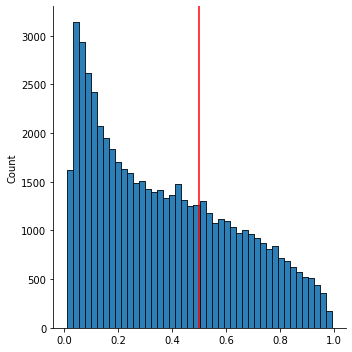

In [ ]:
# 현재는 임계값 0.5(default)를 기준으로 심장병 여부를 분류하고 있습니다. 

y_pred_proba = logistic.predict_proba(X_val_ohe)[:,1]
sns.displot(y_pred_proba)

threshold = 0.5
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

              precision    recall  f1-score   support

           0       0.99      0.51      0.67     51450
           1       0.16      0.93      0.27      5109

    accuracy                           0.55     56559
   macro avg       0.57      0.72      0.47     56559
weighted avg       0.91      0.55      0.63     56559



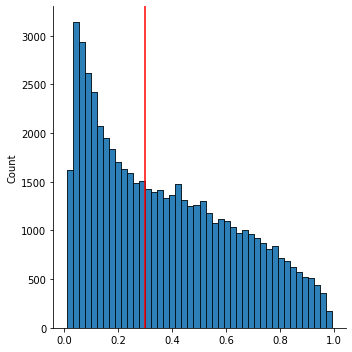

In [ ]:
# 만약 임계값을 낮추면 어떻게 될까요?

sns.displot(y_pred_proba)

threshold = 0.3
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

print(classification_report(y_val, y_pred))

임계값을 낮추니 class1에 해당하는 재현율이 올라가고 정밀도가 떨어졌습니다.  
아래 그래프에서 임계값을 바꿔가며 재현율과 정밀도가 어떻게 변하는지 확인해보세요.

In [ ]:
from ipywidgets import interact, fixed

def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

    
interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

<function __main__.explore_threshold(y_true, y_pred_proba, threshold=0.5)>

이처럼 임계값이 변함에 따라 정밀도가 올라가고 재현율이 낮아지거나 정밀도가 낮아지고 재현율이 높아집니다. 정밀도와 재현율이 trade-off 관계이기 때문입니다.

1. 임계값이 커지면 모델이 Positive라고 예측하는 샘플의 수가 적어집니다.
  - Positive인데 Negative로 예측하는 비율이 높아집니다. $\rightarrow$ FN이 증가합니다. $\rightarrow$ Recall이 감소합니다.
  - Positive라고 예측하면 실제 Positive인 비율이 높아집니다. $\rightarrow$ FP가 감소합니다. $\rightarrow$ Precision이 증가합니다.
  
2. 임계값이 작아지면 모델이 Positive라고 예측하는 샘플의 수가 많아집니다.
  - Negative라고 예측하면 실제 Negative인 비율이 높아집니다. $\rightarrow$ FN 감소합니다. $\rightarrow$ Recall이 증가합니다.
  - Negative인데 Positive로 예측하는 비율이 높아집니다. $\rightarrow$ FP가 증가합니다. $\rightarrow$ Precision이 감소합니다.  

In [ ]:
thresholds = [0.3, 0.5, 0.8]
for threshold in thresholds :
    probability = logistic.predict_proba(X_val_ohe)[:,1]
    prediction = probability >= threshold
    true_label = y_val
    tmp = pd.DataFrame({'true label':true_label , 'prediction':prediction})
    con1 = tmp['true label'] == tmp['prediction']
    con2 = tmp['prediction'] == True

    TP = len(tmp[con1 & con2])
    FP = len(tmp[~con1 & con2])
    FN = len(tmp[~con1 & ~con2])
    
    neg, pos = tmp['prediction'].value_counts()
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    print(f'Threshold: {threshold}')
    print(f'# of Positive: {pos}')
    print(f'# of Negative: {neg}')
    print(f'FN: {FN}, FP: {FP}')
    print(f'recall: {round(recall,2)}, precision: {round(precision,2)}')
    print('--------------------')



Threshold: 0.3
# of Positive: 26541
# of Negative: 30018
FN: 370, FP: 25279
recall: 0.93, precision: 0.16
--------------------
Threshold: 0.5
# of Positive: 17877
# of Negative: 38682
FN: 1184, FP: 13952
recall: 0.77, precision: 0.22
--------------------
Threshold: 0.8
# of Positive: 4351
# of Negative: 52208
FN: 3434, FP: 2676
recall: 0.33, precision: 0.38
--------------------


### ROC, AUC (Receiver Operating Characteristic, Area Under the Curve)

- 모델이 예측하는 확률, 모델의 예측값 자체를 평가하는 평가지표로 ROC, AUC가 있습니다.

#### ROC Curve
- ROC Curve는 여러 임계값에 대해 TPR(True Positive Rate, recall)과 FPR(False Positive Rate)을 그래프로 보여줍니다.
- [Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

**Recall(재현율) = Sensitivity(민감도)** = ${\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$

**Fall-out(위양성률)** = ${\displaystyle \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR(Specificity)} }$

- 재현율을 높이기 위해서는 Positive로 판단하는 임계값을 계속 낮추어 모두 Positive로 판단하게 만들면 됩니다. 하지만 이렇게 하면 동시에 Negative이지만 Positive로 판단하는 위양성률도 같이 높아집니다.
    - 임계값이 1인 경우 TPR, FPR 모두 0이 됩니다. 
    - 임계값이 0인 경우 TPR, FPR 모두 1이 됩니다.  

- 아래 링크에서 두 클래스의 분포와 임계값을 변형시키며 ROC Curve의 변화를 살펴보세요

[Understanding ROC Curve](http://www.navan.name/roc/)


#### AUC
- ROC 곡선 아래의 면적을 이용하면 분류 모델의 성능을 나타내는 지표를 구할 수 있습니다. 이를 **AUC(area under the curve)** 라고 합니다.
- 일반적으로 AUC 값이 1에 가까울수록 성능이 좋은 모델이며 0.5에 가까울수록 성능이 안 좋은 모델입니다. 

AUC는 Roc Curve 아래의 면적이라는 의미이지만 아래 그림을 통해 조금 더 깊게 이해해봅시다.  

<img src = "https://ifh.cc/g/QyBacs.jpg" width="60%">

- 위의 그림에서 무작위로 Positive 샘플(green) 하나와 Negative 샘플(red) 하나를 뽑아봅시다.
- 이 때 Positive 샘플의 예측값이 1에 가깝고 Negative 샘플의 예측값이 0에 가까울수록 좋은 모델일 것입니다.
- AUC score는 모델이 Positive 샘플의 예측값을 Negative 샘플의 예측값보다 크게 줄 확률입니다.
    - 위의 그림을 기준으로 생각하면 Positive 샘플을 더 오른쪽에 두고 Negative 샘플을 더 왼쪽에 둘 확률입니다.
    - AUC score가 크다는 것은 Positive 샘플이 위의 그림에서 오른쪽에 있을 확률이 높다는 것이기 때문에 이 모델은 좋은 성능의 분류기라고 판단할 수 있습니다.

[auc 참고자료](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

- 의학분야에서 많이 쓰이고 머신러닝의 이진 분류 모델의 예측 성능 판단에도 중요하게 사용되는 평가지표입니다. 
- 분류 결과보다 모델의 예측 확률값 자체가 중요할 경우 많이 사용됩니다.
    - 영화 추천 모델(각 영화에 대해 유저가 볼 것인가 보지 않을 것인가를 분류하는 문제)의 경우, 일반적으로 모델의 예측 점수에 따라 순서대로 웹 사이트 등에 영화를 제시합니다(모델의 예측 확률이 높은 순서대로).

In [ ]:
# roc_curve 함수를 사용하면 각 임계값에 따른 fpr과 tpr을 쉽게 구할 수 있습니다.

from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,1.993953
1,0.000000,0.000196,0.993953
2,0.000000,0.000979,0.991687
3,0.000039,0.000979,0.991279
4,0.000039,0.001174,0.991045
...,...,...,...
7854,0.997162,0.999609,0.016912
7855,0.997162,0.999804,0.016910
7856,0.998056,0.999804,0.016051
7857,0.998056,1.000000,0.016011


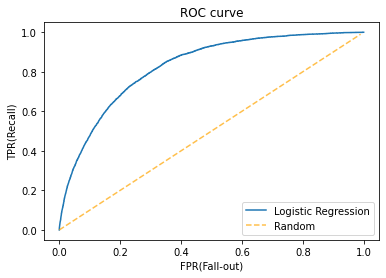

In [ ]:
# 위의 tpr, fpr, threshold를 이용해 ROC Curve를 그려보겠습니다.

plt.plot(fpr, tpr, label='Logistic Regression')
x_base = np.arange(0, 1.0, 0.01)
y_base = np.arange(0, 1.0, 0.01)
plt.plot(x_base, y_base, linestyle='--', color = 'orange', alpha=0.7, label='Random')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [ ]:
# auc_score 역시 sklearn에서 손쉽게 불러와 사용할 수 있습니다.

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val, y_pred_proba)
print(f"Logistic Regression의 auc score : {auc.round(3)}")

Logistic Regression의 auc score : 0.827


위에서 만든 로지스틱 회귀모델의 auc score는 0.827입니다.
- Positive 샘플의 확률이 Negative 샘플의 확률보다 클 확률이 0.827라고 볼 수 있습니다.  

랜덤으로 실제값이 1인 샘플 50개와 실제값이 0인 샘플 50개를 뽑아서 확인해보겠습니다.
- 우리 모델은 실제로 `실제값이 1인 샘플의 예측값`이 `실제값이 0인 샘플의 예측값`보다 높을 확률이 0.827 정도가 될까요?
- 50개의 샘플을 랜덤으로 뽑아서 확인해봤을 때 0.84가 나왔습니다.

In [ ]:
result = pd.concat([y_val.reset_index(drop=True), pd.Series(y_pred_proba)], axis=1)

In [ ]:

class1 = result[result['HeartDisease']==1].sample(50, random_state=3)[0].values
class0 = result[result['HeartDisease']==0].sample(50, random_state=3)[0].values

((class1-class0)>0).sum() / 50

0.84

ROC curve를 이용하면 최적의 임계값을 찾을 수 있습니다.
- TPR이 최대가 되고 FPR이 최소가 되는 지점이 최적의 임계값입니다.
- TPR - FPR이 최대가 되는 지점을 찾으면 됩니다.

idx: 6374 , threshold: 0.4240669296608328


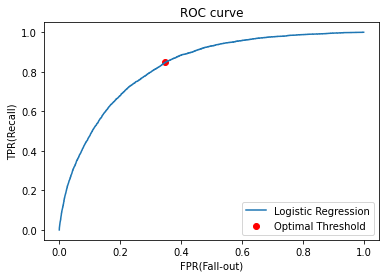

In [ ]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

optimal_fpr = roc[roc['Threshold'] == optimal_threshold]['FPR(Fall-out)']
optimal_tpr = roc[roc['Threshold'] == optimal_threshold]['TPR(Recall)']

plt.plot(fpr, tpr, label='Logistic Regression')

plt.scatter(optimal_fpr, optimal_tpr, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

최적의 임계값을 적용한 결과와 0.5 임계값을 적용한 결과를 비교해보겠습니다.
- 최적의 임계값의 경우 recall이 0.85로 약간 상승한 것을 알 수 있습니다.

In [ ]:
# 최적의 임계값(0.424)의 경우 recall이 0.85로 약간 상승
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78     51450
           1       0.19      0.85      0.32      5109

    accuracy                           0.67     56559
   macro avg       0.59      0.75      0.55     56559
weighted avg       0.91      0.67      0.74     56559



In [ ]:
y_pred_optimal = y_pred_proba >= 0.5
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     51450
           1       0.22      0.77      0.34      5109

    accuracy                           0.73     56559
   macro avg       0.59      0.75      0.59     56559
weighted avg       0.90      0.73      0.79     56559



## 👏 마무리
#### 이번 노트에서는 
- 분류 문제에 대해 배웠습니다.
- 분류 알고리즘 중 가장 먼저 Logistic Regression에 대해 배웠습니다.
- 분류 문제에 사용하는 평가지표에 대해 배웠습니다.
<br></br>

#### 학습 후 아래 질문에 답해 보세요.
1. 타겟값, 기준모델, 평가지표 등에서 분류 문제는 회귀 문제와 무엇이 다른가요?
2. Logistic Regression과 Linear Regression의 차이는 무엇인가요?
3. 재현율과 정밀도는 무엇이며 이 둘은 왜 트레이드오프 관계에 있나요?
4. AUC Score가 의미하는 것은 무엇인가요?

## 참고자료

#### Logistic Regression
- [5 Reasons “Logistic Regression” should be the first thing you learn when becoming a Data Scientist](https://towardsdatascience.com/5-reasons-logistic-regression-should-be-the-first-thing-you-learn-when-become-a-data-scientist-fcaae46605c4)
- [Logistic Regression Details Pt1: Coefficients](https://youtu.be/vN5cNN2-HWE)
- [Logistic Regression Details Pt 2: Maximum Likelihood](https://youtu.be/BfKanl1aSG0)
- [Probability of passing an exam versus hours of study](https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study)


#### Metrics for Classificaiton
- [Making sense of the confusion matrix
](https://youtu.be/8Oog7TXHvFY)
- [Machine Learning tips and tricks cheatsheet](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks)
- [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=for%20multiclass%20model%3F-,What%20is%20AUC%20%2D%20ROC%20Curve%3F,capable%20of%20distinguishing%20between%20classes.)
- [3.3.2.14. Receiver operating characteristic (ROC)](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc)
- [auc 참고자료](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
